# Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data wrangling

In [16]:
# Gathering data
dtype_dict = {
    "Mediennummer": "string",
    "Sigel": "string",
    "Fachst_1": "string",
    "Fachst_2": "string",
    "Aufstellung": "string",
    "MTC": "string",
    "Physikalische_Form": "string",
    "Sachgr.": "string",
    "StO": "string",
    "Erwerbungsart": "string",
    "Ausleihen": "int64",
    "Verlängerungen": "int64",
    "Anzahl_Exemplare": "int64",
    "Sum_Ausl": "int64"
}

BesEx_2022_cleaned_df = pd.read_csv(
    "BesEx_2022_cleaned.csv",
    dtype=dtype_dict,
    parse_dates=["Inventarisierung"]  # pour forcer la colonne en datetime
)

BesEx_2022_cleaned_df.dtypes


Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                   string[python]
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
dtype: object

In [17]:
# Gathering data
dtype_dict = {
    "Mediennummer": "string",
    "Sigel": "string",
    "Fachst_1": "string",
    "Fachst_2": "string",
    "Aufstellung": "string",
    "MTC": "string",
    "Physikalische_Form": "string",
    "Sachgr.": "string",
    "StO": "string",
    "Erwerbungsart": "string",
    "Ausleihen": "int64",
    "Verlängerungen": "int64",
    "Anzahl_Exemplare": "int64",
    "Sum_Ausl": "int64"
}

BesEx_2024_cleaned_df = pd.read_csv(
    "BesEx_2024_cleaned.csv",
    dtype=dtype_dict,
    parse_dates=["Inventarisierung"]  # pour forcer la colonne en datetime
)

BesEx_2024_cleaned_df.dtypes


Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                   string[python]
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
dtype: object

# Create columns Ausl_Jahr

In [18]:
BesEx_2022_cleaned_df["Ausl_Jahr"] = 2022
BesEx_2024_cleaned_df["Ausl_Jahr"] = 2024

# Create dataframe BesEx_2022_2022

In [19]:
#concatenated = pandas.concat([df1, df2])
BesEx_2022_2024_df = pd.concat([BesEx_2022_cleaned_df, BesEx_2024_cleaned_df])
BesEx_2022_2024_df

,Mediennummer,Sigel,Fachst_1,Fachst_2,Aufstellung,MTC,Physikalische_Form,Sachgr.,Preis,StO,Inventarisierung,Ausleihen,Verlängerungen,Erwerbungsart,Anzahl_Exemplare,Sum_Ausl,Ausl_Jahr
0,0,477,SA,E,<NA>,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
1,477,477,SA,E,LESE,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
2,13477,477,SA,E,LESE,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
3,26477,477,SA,E,Raum0,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
4,39477,477,SA,E,Raum0,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330974,7018969457,975,SL,K,Fran,1,0n,1.1,18.5,<NA>,2024-08-12,1,0,K,1,1,2024
330975,7018972457,975,SL,K,Fran,1,0n,1.1,15.5,<NA>,2024-08-12,2,1,K,1,3,2024
330976,7018985457,975,SL,K,Fran,1,0n,2.1,15.5,<NA>,2024-08-12,3,1,K,1,4,2024
330977,7018998457,975,SL,E,Rus,1,0n,Roman,15.0,<NA>,2024-08-12,3,0,K,1,3,2024


# Exploratory Data Analysis (EDA) 

Entwicklung 2022-2024: Subplot Adults/Children Linien Plot for media typ

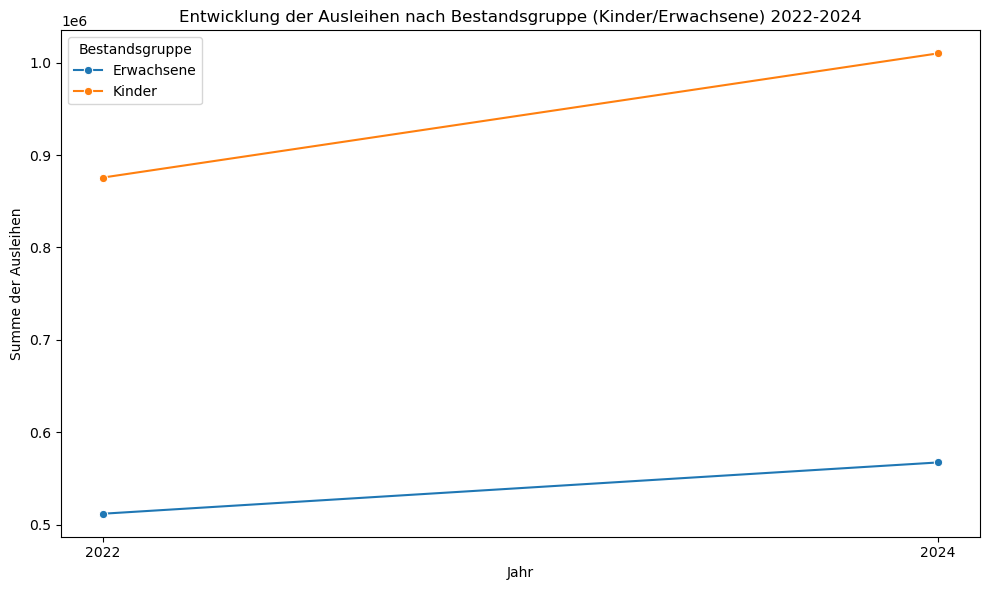

In [20]:

# ---------------------------
# 1️⃣ Remplacer les codes par des noms clairs
# ---------------------------
BesEx_2022_2024_df['Fachst_2'] = BesEx_2022_2024_df['Fachst_2'].map({'E': 'Erwachsene', 'K': 'Kinder'})

# ---------------------------
# 2️⃣ Grouper les prêts par année et par Fachst_2
# ---------------------------
jahres_counts = BesEx_2022_2024_df.groupby(['Ausl_Jahr','Fachst_2'])['Sum_Ausl'].sum().reset_index()

# ---------------------------
# 3️⃣ Visualisation
# ---------------------------
plt.figure(figsize=(10,6))
sns.lineplot(
    data=jahres_counts,
    x='Ausl_Jahr',
    y='Sum_Ausl',
    hue='Fachst_2',
    marker='o'
)

plt.title("Entwicklung der Ausleihen nach Bestandsgruppe (Kinder/Erwachsene) 2022-2024")
plt.xlabel("Jahr")
plt.ylabel("Summe der Ausleihen")
plt.xticks(jahres_counts['Ausl_Jahr'].unique())  # Afficher toutes les années
plt.legend(title="Bestandsgruppe")
plt.tight_layout()
plt.show()


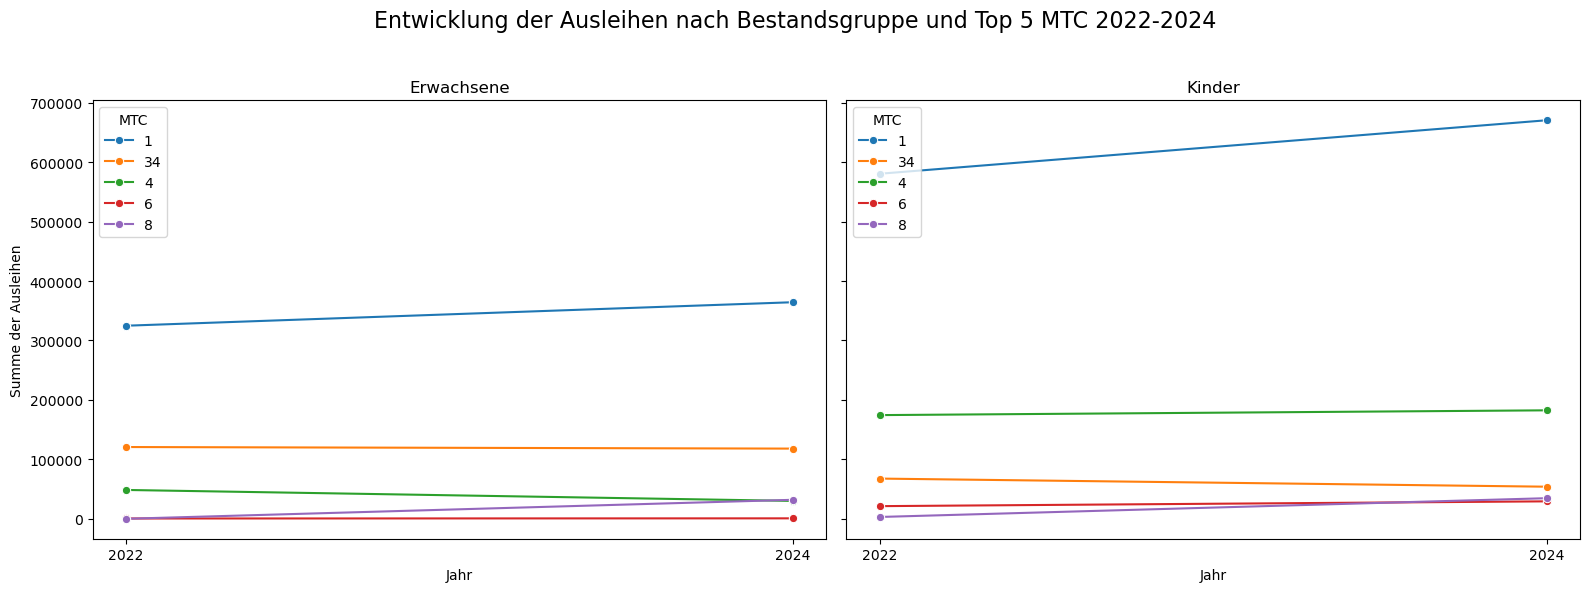

In [21]:

# ---------------------------
# 1️⃣ Calculer le total des emprunts par MTC
# ---------------------------
mtc_top5 = BesEx_2022_2024_df.groupby('MTC')['Sum_Ausl'].sum().nlargest(5).index.tolist()

# ---------------------------
# 2️⃣ Filtrer uniquement ces MTC
# ---------------------------
df_top5 = BesEx_2022_2024_df[BesEx_2022_2024_df['MTC'].isin(mtc_top5)]

# ---------------------------
# 3️⃣ Grouper les données par année, Fachst_2 et MTC
# ---------------------------
jahres_counts = df_top5.groupby(['Ausl_Jahr','Fachst_2','MTC'])['Sum_Ausl'].sum().reset_index()

# ---------------------------
# 4️⃣ Préparer les subplots
# ---------------------------
fig, axes = plt.subplots(ncols=2, figsize=(16,6), sharey=True)

fachst2_values = ['Erwachsene', 'Kinder']  # Assurez-vous que les valeurs sont déjà renommées
titles = ["Erwachsene", "Kinder"]

for ax, fachst2, title in zip(axes, fachst2_values, titles):
    subset = jahres_counts[jahres_counts['Fachst_2'] == fachst2]
    sns.lineplot(
        data=subset,
        x='Ausl_Jahr',
        y='Sum_Ausl',
        hue='MTC',
        marker='o',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("Jahr")
    ax.set_ylabel("Summe der Ausleihen")
    ax.set_xticks(subset['Ausl_Jahr'].unique())
    ax.legend(title="MTC", loc='upper left')

plt.suptitle("Entwicklung der Ausleihen nach Bestandsgruppe und Top 5 MTC 2022-2024", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


comet chart

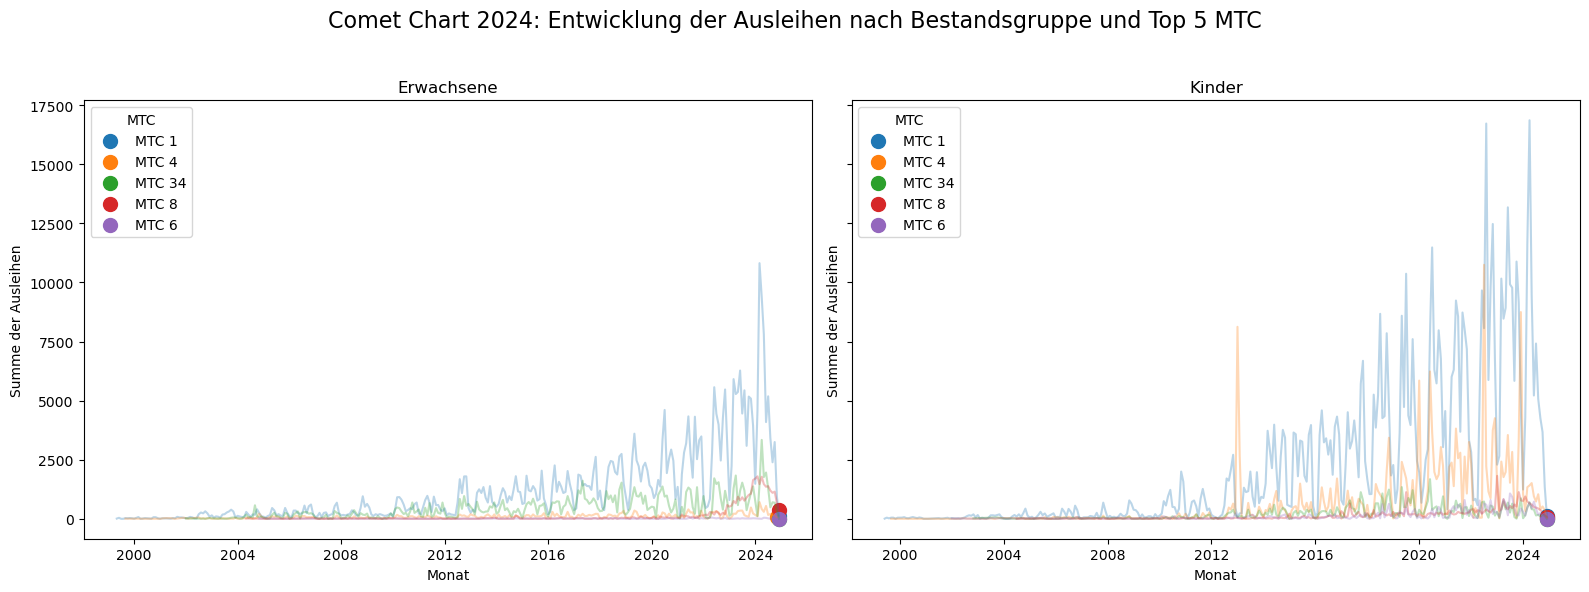

In [23]:

# ---------------------------
# 1️⃣ Calculer le total des emprunts par MTC (pour 2024)
# ---------------------------
df_2024 = BesEx_2022_2024_df[BesEx_2022_2024_df['Ausl_Jahr'] == 2024]
mtc_top5 = df_2024.groupby('MTC')['Sum_Ausl'].sum().nlargest(5).index.tolist()

# ---------------------------
# 2️⃣ Filtrer uniquement ces MTC
# ---------------------------
df_top5 = df_2024[df_2024['MTC'].isin(mtc_top5)].copy()

# ---------------------------
# 3️⃣ Grouper par mois et MTC
# ---------------------------
df_top5['JahrMonat'] = df_top5['Inventarisierung'].dt.to_period('M')
ausleih_monatlich = df_top5.groupby(['JahrMonat','Fachst_2','MTC'])['Sum_Ausl'].sum().reset_index()
ausleih_monatlich['JahrMonat'] = ausleih_monatlich['JahrMonat'].dt.to_timestamp()

# ---------------------------
# 4️⃣ Subplots pour Erw./Kinder
# ---------------------------
fachst2_values = ['Erwachsene', 'Kinder']
titles = ["Erwachsene", "Kinder"]

fig, axes = plt.subplots(ncols=2, figsize=(16,6), sharey=True)

for ax, fachst2, title in zip(axes, fachst2_values, titles):
    subset = ausleih_monatlich[ausleih_monatlich['Fachst_2'] == fachst2]
    
    for mtc in mtc_top5:
        mtc_data = subset[subset['MTC'] == mtc]
        if mtc_data.empty:
            continue
        # Traînée (Comet effect)
        ax.plot(mtc_data['JahrMonat'], mtc_data['Sum_Ausl'], alpha=0.3)
        # Dernier point visible
        ax.scatter(mtc_data['JahrMonat'].iloc[-1], mtc_data['Sum_Ausl'].iloc[-1], s=100, label=f"MTC {mtc}")
    
    ax.set_title(title)
    ax.set_xlabel("Monat")
    ax.set_ylabel("Summe der Ausleihen")
    ax.legend(title="MTC", loc='upper left')

plt.suptitle("Comet Chart 2024: Entwicklung der Ausleihen nach Bestandsgruppe und Top 5 MTC", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


# The end